In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from glob import glob

In [2]:
ls data

 Volume in drive C has no label.
 Volume Serial Number is BA1A-7CCC

 Directory of C:\Users\eugur\Jupyter\ITU_Farplas_Deep_Learning\data

27.10.2020  14:35    <DIR>          .
27.10.2020  14:35    <DIR>          ..
27.10.2020  14:28    <DIR>          female
27.10.2020  16:18    <DIR>          female_crop
27.10.2020  14:29    <DIR>          male
14.01.2020  19:46            25.144 male_000281.jpg
27.10.2020  16:18    <DIR>          male_crop
22.03.2020  08:09         5.908.737 video.mp4
               2 File(s)      5.933.881 bytes
               6 Dir(s)  72.258.531.328 bytes free


In [3]:
female = glob('./data/female_crop/*.jpg')

In [4]:
male = glob('./data/male_crop/*.jpg')

In [5]:
path = female + male

In [6]:
# Gettin size of image
def getSize(path):
    
    img = Image.open(path)
    return img.size[0]

In [7]:
getSize(path[2])

74

In [8]:
# Create DataFrame
df = pd.DataFrame(data=path,columns=['path'])
df.head()

,path
0,./data/female_crop\1003_female.jpg
1,./data/female_crop\1005_female.jpg
2,./data/female_crop\1008_female.jpg
3,./data/female_crop\1009_female.jpg
4,./data/female_crop\100_female.jpg


In [9]:
df['size'] = df['path'].apply(getSize)

In [10]:
df.head()

,path,size
0,./data/female_crop\1003_female.jpg,141
1,./data/female_crop\1005_female.jpg,218
2,./data/female_crop\1008_female.jpg,74
3,./data/female_crop\1009_female.jpg,174
4,./data/female_crop\100_female.jpg,198


In [11]:
# EDA

In [12]:
df.describe()

,size
count,7296.000000
mean,146.145285
std,67.844668
min,26.000000
25%,89.000000
50%,135.000000
75%,197.000000
max,364.000000


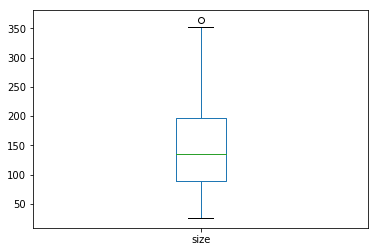

In [13]:
df['size'].plot('box')

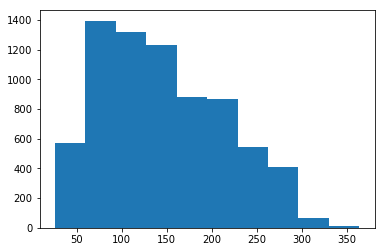

In [14]:
plt.hist(df['size'])
plt.show()

In [15]:
df_new = df[df['size'] > 60]

In [16]:
len(df_new)

6659

In [23]:
string = df_new['path'][0]
def gender(string):
    try:
        return string.split('_')[0].split('/')[-1]
    except:
        return None

In [24]:
df['gender'] = df['path'].apply(gender)

In [26]:
df.head()

,path,size,gender
0,./data/female_crop\1003_female.jpg,141,female
1,./data/female_crop\1005_female.jpg,218,female
2,./data/female_crop\1008_female.jpg,74,female
3,./data/female_crop\1009_female.jpg,174,female
4,./data/female_crop\100_female.jpg,198,female


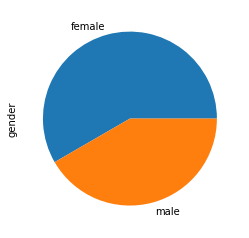

In [29]:
df['gender'].value_counts(normalize=True).plot(kind='pie')

In [30]:
df['gender'].value_counts(normalize=True)

female    0.58347
male      0.41653
Name: gender, dtype: float64

In [31]:
df_new['size'].min()

61

In [36]:
def resize_img(path_to_resize):
    img = cv2.imread(path_to_resize)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    size = gray.shape[0]
    if size >= 100:
        gray_re = cv2.resize(gray,(100,100),cv2.INTER_AREA) #shrink
    else:
        gray_re = cv2.resize(gray,(100,100),cv2.INTER_AREA) # enlarge
    flat_img = gray_re.flatten()
    return flat_img

In [42]:
df_new.head()

,path,size,gender
0,./data/female_crop\1003_female.jpg,141,female
1,./data/female_crop\1005_female.jpg,218,female
2,./data/female_crop\1008_female.jpg,74,female
3,./data/female_crop\1009_female.jpg,174,female
4,./data/female_crop\100_female.jpg,198,female


In [41]:
df_new['gender'] = df_new['path'].apply(gender)

C:\Users\eugur\.conda\envs\pytorch_opencv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_new['structured_data'] = df_new['path'].apply(resize_img)

C:\Users\eugur\.conda\envs\pytorch_opencv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_new.head()

,path,size,gender,structured_data
0,./data/female_crop\1003_female.jpg,141,female,"[35, 36, 36, 36, 36, 36, 36, 35, 36, 37, 35, 3..."
1,./data/female_crop\1005_female.jpg,218,female,"[31, 37, 15, 49, 72, 64, 44, 70, 81, 93, 110, ..."
2,./data/female_crop\1008_female.jpg,74,female,"[34, 33, 28, 22, 22, 27, 31, 30, 23, 25, 32, 4..."
3,./data/female_crop\1009_female.jpg,174,female,"[72, 65, 55, 51, 50, 53, 49, 56, 54, 50, 48, 5..."
4,./data/female_crop\100_female.jpg,198,female,"[154, 154, 151, 150, 147, 129, 78, 37, 16, 12,..."


In [50]:
df1 = df_new['structured_data'].apply(pd.Series)

In [48]:
df1.head()

0    [35, 36, 36, 36, 36, 36, 36, 35, 36, 37, 35, 3...
1    [31, 37, 15, 49, 72, 64, 44, 70, 81, 93, 110, ...
2    [34, 33, 28, 22, 22, 27, 31, 30, 23, 25, 32, 4...
3    [72, 65, 55, 51, 50, 53, 49, 56, 54, 50, 48, 5...
4    [154, 154, 151, 150, 147, 129, 78, 37, 16, 12,...
Name: structured_data, dtype: object

In [51]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,35,36,36,36,36,36,36,35,36,37,...,106,114,125,129,130,135,121,99,103,114
1,31,37,15,49,72,64,44,70,81,93,...,132,132,132,134,134,136,136,133,138,136
2,34,33,28,22,22,27,31,30,23,25,...,31,32,39,39,37,34,31,30,30,29
3,72,65,55,51,50,53,49,56,54,50,...,150,151,150,150,149,152,151,153,147,148
4,154,154,151,150,147,129,78,37,16,12,...,179,182,188,187,173,178,166,165,162,143


In [52]:
df2 = pd.concat((df_new['gender'],df1),axis=1)

In [53]:
df2.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,35,36,36,36,36,36,36,35,36,...,106,114,125,129,130,135,121,99,103,114
1,female,31,37,15,49,72,64,44,70,81,...,132,132,132,134,134,136,136,133,138,136
2,female,34,33,28,22,22,27,31,30,23,...,31,32,39,39,37,34,31,30,30,29
3,female,72,65,55,51,50,53,49,56,54,...,150,151,150,150,149,152,151,153,147,148
4,female,154,154,151,150,147,129,78,37,16,...,179,182,188,187,173,178,166,165,162,143


Text(0.5, 1.0, 'female')

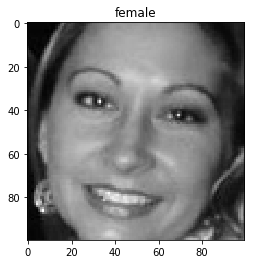

In [61]:
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')
plt.title(df2.loc[0]['gender'])

In [62]:
import pickle

In [63]:
pickle.dump(df2,open('./data/dataframe_images_100_100.pickle','wb'))

In [64]:
df3 = pickle.load(open('./data/dataframe_images_100_100.pickle','rb'))

In [65]:
df3.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,35,36,36,36,36,36,36,35,36,...,106,114,125,129,130,135,121,99,103,114
1,female,31,37,15,49,72,64,44,70,81,...,132,132,132,134,134,136,136,133,138,136
2,female,34,33,28,22,22,27,31,30,23,...,31,32,39,39,37,34,31,30,30,29
3,female,72,65,55,51,50,53,49,56,54,...,150,151,150,150,149,152,151,153,147,148
4,female,154,154,151,150,147,129,78,37,16,...,179,182,188,187,173,178,166,165,162,143


In [66]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6659 entries, 0 to 7295
Columns: 10001 entries, gender to 9999
dtypes: object(1), uint8(10000)
memory usage: 63.6+ MB


In [70]:
df3.isnull().sum()

gender    0
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
         ..
9970      0
9971      0
9972      0
9973      0
9974      0
9975      0
9976      0
9977      0
9978      0
9979      0
9980      0
9981      0
9982      0
9983      0
9984      0
9985      0
9986      0
9987      0
9988      0
9989      0
9990      0
9991      0
9992      0
9993      0
9994      0
9995      0
9996      0
9997      0
9998      0
9999      0
Length: 10001, dtype: int64

In [71]:
X = df3.iloc[:,1:].values
y = df3.iloc[:,0:].values

In [72]:
X.shape

(6659, 10000)

In [73]:
y.shape

(6659, 10001)

## Min max scaling

## Xnorm = $\frac {x-minValue}{maxValue-minValue}$

In [77]:
X.min(), X.max()

(0, 255)

In [78]:
Xnorm = X/X.max()

In [81]:
# female = 1 male = 0
ynorm = np.where(y=='female',1,0)

## Saving Numpy array as numpy zip format

In [83]:
np.savez('./data/data_100_100_norm',Xnorm,ynorm)

## Loading numpy zip format

In [84]:
data = np.load('./data/data_100_100_norm.npz')

In [85]:
data.files

['arr_0', 'arr_1']

In [95]:
X = data['arr_0'] #independant features
y = data['arr_1'] #target value

In [87]:
X.shape

(6659, 10000)

In [93]:
y.shape

(0, 10001)

In [97]:
y=y[:,0]

In [99]:
y.shape

(6659,)

## Eigen Image

In [101]:
X1 = X-X.mean(axis=0)

In [104]:
from sklearn.decomposition import PCA

In [106]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')

In [107]:
x_pca = pca.fit_transform(X1)

In [108]:
x_pca.shape

(6659, 6659)

In [109]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

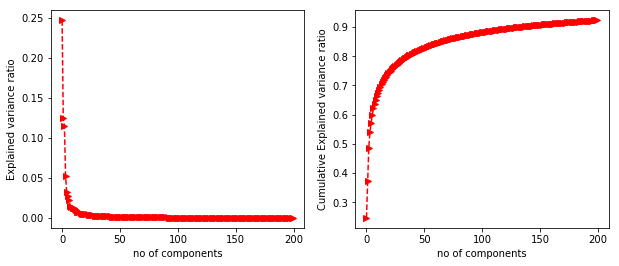

In [115]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.xlabel('no of components')
plt.ylabel('Explained variance ratio')
plt.subplot(1,2,2)
plt.xlabel('no of components')
plt.ylabel('Cumulative Explained variance ratio')
plt.plot(eigen_ratio_cum[:200],'r>--')

conclusion: using elbow method consider number of components is between 25-30 since if i consider component between 25 to 30 the explained variance is around %75, in order to get minimum %80 variance i am considering 50 components

In [116]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
x_pca_50 = pca_50.fit_transform(X1)

In [117]:
x_pca_50.shape

(6659, 50)

In [119]:
## saving pca
pickle.dump(pca_50,open('./data/pca_50.pickle','wb'))

## Consider 50 component and inverse transform 

In [121]:
x_pca_inv = pca_50.inverse_transform(x_pca_50)

In [122]:
x_pca_inv.shape

(6659, 10000)

In [123]:
# consider one image (one row)
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((100,100))
eig_img.shape

(100, 100)

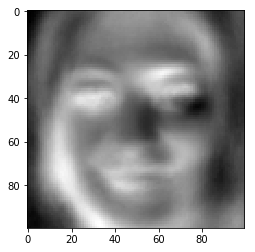

In [125]:
plt.imshow(eig_img,cmap='gray')

In [127]:
np.savez('./data/data_pca_50_y_mean',x_pca_50,y,X.mean())

## Suppor Vector Machine

In [175]:
data = np.load('./data/data_pca_50_y_mean.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [176]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [132]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

## Training a machine learning model

In [134]:
from sklearn.svm import SVC

In [139]:
model = SVC(C=1,kernel='rbf',gamma=0.01,probability=True)

In [140]:
model.fit(x_train,y_train)
print('model trained succesfully')

model trained succesfully


In [141]:
#SCORE
model.score(x_train,y_train)

0.8719729678993805

In [142]:
model.score(x_test,y_test)

0.8265765765765766

In [143]:
from sklearn import metrics

In [146]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)

In [147]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[435, 114],
       [117, 666]], dtype=int64)

In [148]:
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)

In [152]:
pd.DataFrame(cr).T

,f1-score,precision,recall,support
male,0.790191,0.788043,0.792350,549.0
female,0.852207,0.853846,0.850575,783.0
micro avg,0.826577,0.826577,0.826577,1332.0
macro avg,0.821199,0.820945,0.821462,1332.0
weighted avg,0.826646,0.826725,0.826577,1332.0


## Hyper Parameter Tuning

In [154]:
model_tune = SVC()

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
param_grid = {'C':[1,10,20,30,50,100],'kernel':['rbf','poly'],'gamma':[0.1,0.005,0.01,0.001,0.002,0.005],
             'coef0':[0,1],}

In [158]:
model_grid = GridSearchCV(model_tune,param_grid=param_grid,scoring='accuracy',cv=5,verbose=1)

In [159]:
model_grid.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 40.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 20, 30, 50, 100], 'kernel': ['rbf', 'poly'], 'gamma': [0.1, 0.005, 0.01, 0.001, 0.002, 0.005], 'coef0': [0, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [162]:
model_grid.best_params_

{'C': 1, 'coef0': 0, 'gamma': 0.01, 'kernel': 'rbf'}

In [164]:
model_grid.best_score_

0.8052260099113981

## Building machine learning model with best parameter

In [179]:
model_best = SVC(C=1,kernel='rbf',gamma=0.01,probability=True)

In [180]:
model_best.fit(x_train,y_train)
model_best.score(x_test,y_test)

0.8265765765765766

## Saving machine learning model

In [181]:
pickle.dump(model_best,open('model_svm.pickle','wb'))

In [172]:
pickle.dump(mean,open('mean_preprocessing.pickle','wb'))